<a href="https://colab.research.google.com/github/apowell18/Tableau_Public_Links/blob/main/AmazonTop50Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Dataset: https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io 

#import csv file
from google.colab import files 
upload = files.upload()
df = pd.read_csv(io.BytesIO(upload['bestsellers.csv']))

Saving bestsellers.csv to bestsellers (1).csv


#Data Cleaning

In [2]:
#View the first set of data
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# Check the data types
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [4]:
#remove any N/As
df.dropna()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [5]:
#find outliers
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1

print(IQR) # print IQR for each column

User Rating        0.30
Reviews        13195.25
Price              9.00
Year               6.00
dtype: float64


In [42]:
#now find the outliers
lowerBound = (Q1 - 1.5 * IQR)
upperBound = (Q3 + 1.5 * IQR)

print((df < lowerBound) | (df > upperBound))

     Author  Genre   Name  Price  Reviews  User Rating   Year
0     False  False  False  False    False        False  False
1     False  False  False  False    False        False  False
2     False  False  False  False    False        False  False
3     False  False  False  False    False        False  False
4     False  False  False  False    False        False  False
..      ...    ...    ...    ...      ...          ...    ...
545   False  False  False  False    False        False  False
546   False  False  False  False    False        False  False
547   False  False  False  False    False        False  False
548   False  False  False  False    False        False  False
549   False  False  False  False    False        False  False

[550 rows x 7 columns]


In [43]:
#Remove Outliers
df = df[~(((df < lowerBound) | (df > upperBound))).any(axis=1)]
df.shape

(486, 7)

In [44]:
#Create a copy of the dataset to handle
bestsellers = df
bestsellers

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# Data Exploration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    486.000000
mean       4.650412
std        0.176535
min        4.100000
25%        4.600000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

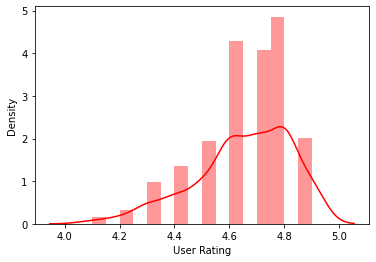

In [51]:
sns.distplot(bestsellers["User Rating"], color="Red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


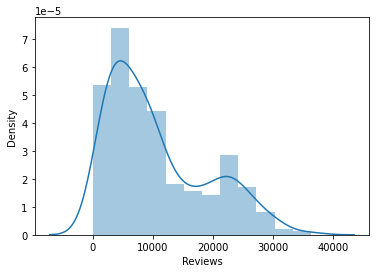

In [46]:
sns.distplot(bestsellers["Reviews"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


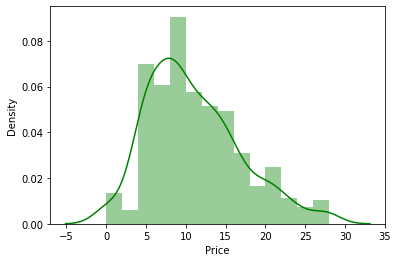

In [142]:
sns.distplot(bestsellers["Price"], color="Green")

The average price of the Bestselling Books is $10.92


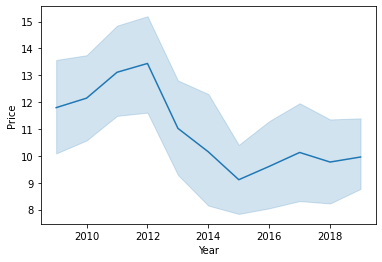

In [143]:
sns.lineplot(data=bestsellers, x=bestsellers["Year"], y=bestsellers["Price"])
avg = bestsellers["Price"].mean()
print("The average price of the Bestselling Books is $%.2f" % (avg))

count    486.000000
mean      10.919753
std        5.876367
min        0.000000
25%        6.000000
50%       10.000000
75%       14.000000
max       28.000000
Name: Price, dtype: float64

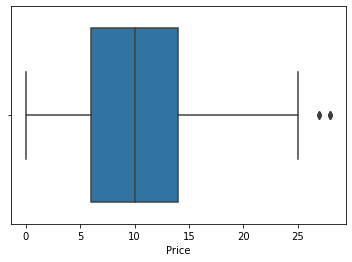

In [50]:
sns.boxplot(data=bestsellers, x=bestsellers["Price"])
bestsellers["Price"].describe()

Throughout the years, there has been more Bestselling Non Fiction books than Fictional Books.
However, Fictional books out performs Non Fictional books in User Ratings.


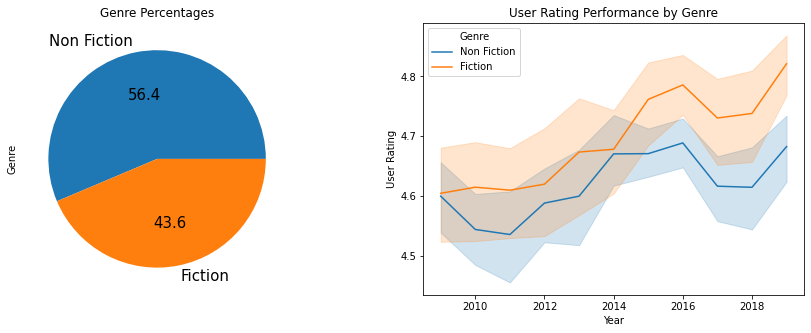

<Figure size 432x288 with 0 Axes>

In [141]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
counts = df['Genre'].value_counts()
# print(countNF)

plt.figure();

counts.plot.pie(ax = axes[0], title = "Genre Percentages" , autopct= '%.1f' ,
      fontsize = 15)

sns.lineplot(ax=axes[1],data=bestsellers,x=bestsellers["Year"], 
      y=bestsellers["User Rating"], 
      hue=bestsellers["Genre"]).set(title="User Rating Performance by Genre")

print("Throughout the years, there has been more Bestselling Non Fiction books" 
      " than Fictional Books.\nHowever, Fictional books out performs Non Fictional" 
      " books in User Ratings.")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


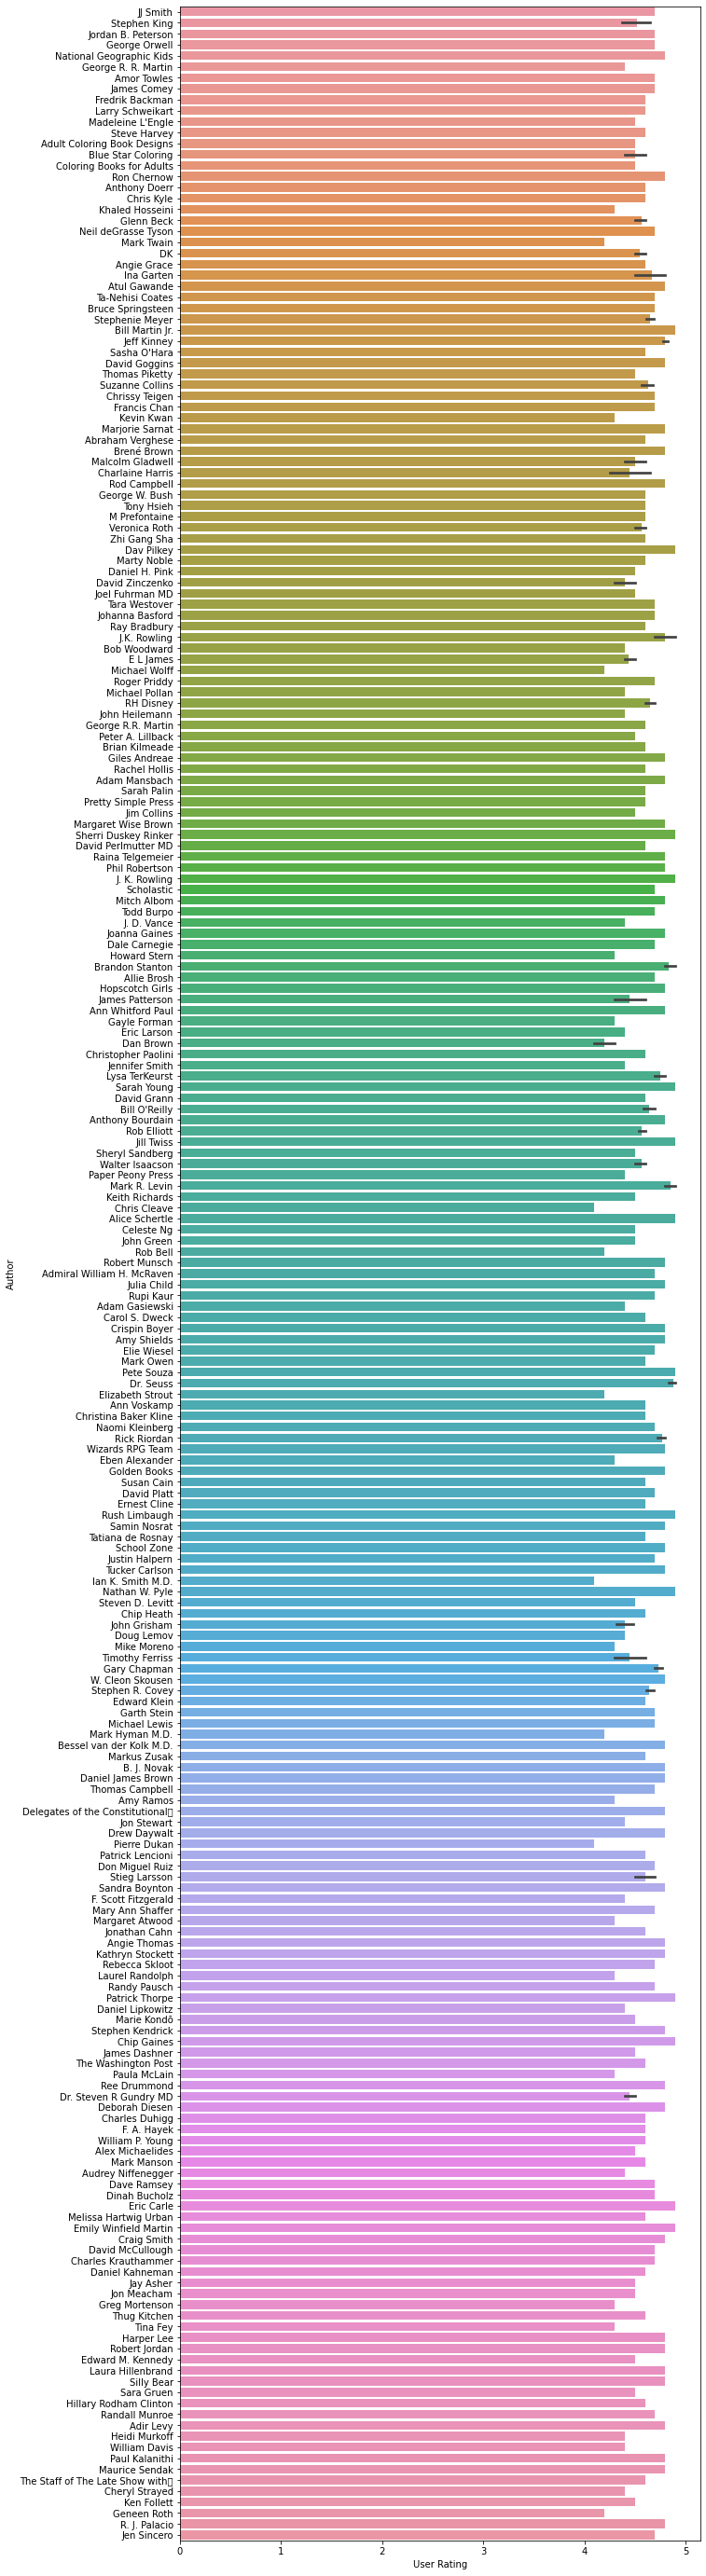

In [164]:
# Break down Demographics of BestSellers, such as age, gender, etc
fig, ax = plt.subplots(figsize=(10, 50))
sns.barplot(data=bestsellers, x=bestsellers["User Rating"], y=bestsellers["Author"],
            hue_order=bestsellers["User Rating"])